# Decision Tree Classifier Implementation With Post Prunning And PrePrunning

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
print('Who\'s this')

Who's this


In [46]:
from sklearn.datasets import load_iris

In [47]:
dataset=load_iris()

In [48]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [49]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [50]:
X=df.iloc[:,:]
y=dataset.target

In [51]:
X.shape

(150, 4)

In [52]:
y.shape

(150,)

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
classifier=DecisionTreeClassifier()

In [56]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 1.65\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.25, 0.21428571428571427, 'x[2] <= 5.05\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 

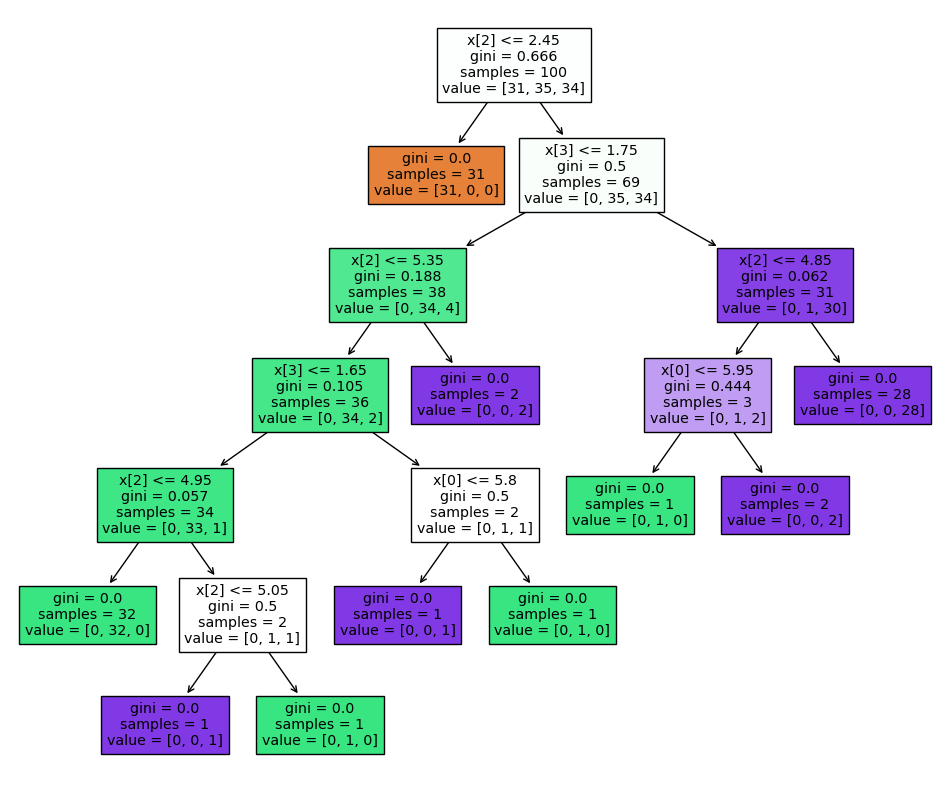

In [57]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)


# Post Prunning

In [58]:
classifier=DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

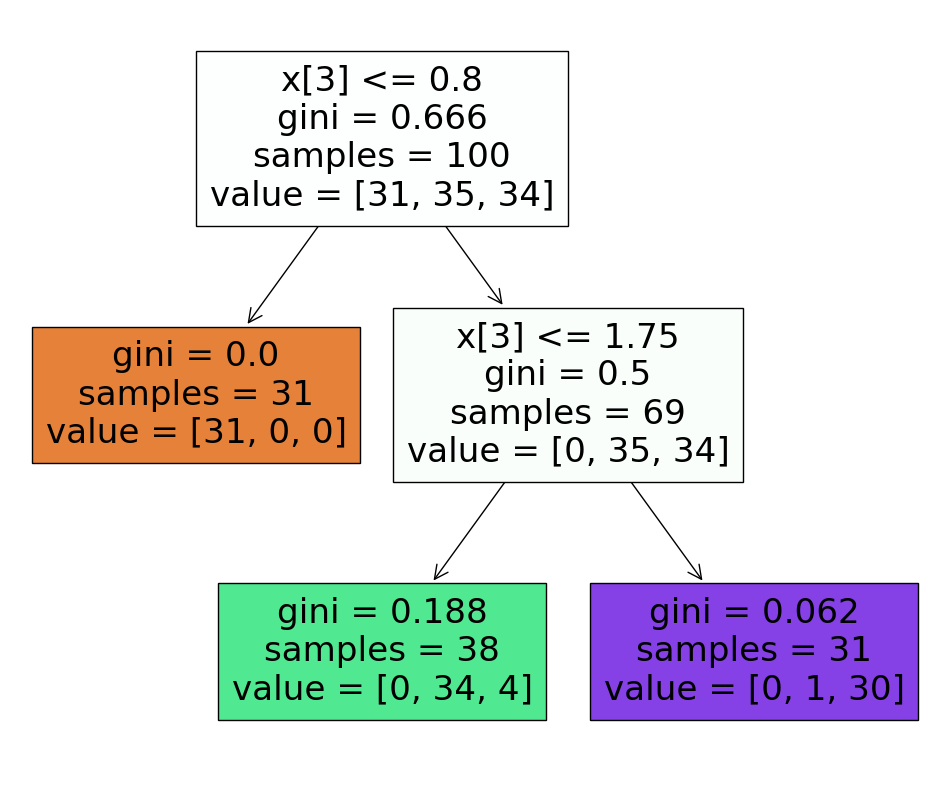

In [59]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)


In [27]:
#Prediction

In [60]:
y_pred=classifier.predict(X_test)

In [61]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [80]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0,  4, 11],
       [ 0,  0, 16]], dtype=int64)

In [64]:
accuracy_score(y_test,y_pred)

0.98

In [65]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        19\n           1       0.94      1.00      0.97        15\n           2       1.00      0.94      0.97        16\n\n    accuracy                           0.98        50\n   macro avg       0.98      0.98      0.98        50\nweighted avg       0.98      0.98      0.98        50\n'

# PrePrunning With Hyper Parameter Tuning

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
cls=DecisionTreeClassifier()

In [70]:
clf=GridSearchCV(cls,param_grid=parameter,cv=5,scoring='accuracy')

In [71]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [72]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'splitter': 'random'}

In [79]:
y_pred=clf.predict(X_test)

In [76]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0,  4, 11],
       [ 0,  0, 16]], dtype=int64)

In [77]:
accuracy_score(y_test,y_pred)

0.78

In [78]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        19\n           1       1.00      0.27      0.42        15\n           2       0.59      1.00      0.74        16\n\n    accuracy                           0.78        50\n   macro avg       0.86      0.76      0.72        50\nweighted avg       0.87      0.78      0.74        50\n'